<a href="https://colab.research.google.com/github/mahendrakevin/Speech-Accent-Recognition/blob/master/EDA%20of%20Speech%20Accent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import cv2
import math
import IPython.display as ipd 
import librosa
import librosa.display
import albumentations as A
from sklearn import metrics as sk_metrics
%matplotlib inline
p = sns.color_palette()
plt.style.use('bmh')

### Access Project Folder

In [ ]:
%cd /content/drive/MyDrive/Data Science/Dataset/Speech Accent

/content/drive/MyDrive/Data Science/Dataset/Speech Accent


### About the dataset
This dataset contains 2140 speech samples, each from a different talker reading the same reading passage. Talkers come from 177 countries and have 214 different native languages. Each talker is speaking in English.

This dataset contains the following files:

* **reading-passage.txt**: the text all speakers read
* **speakers_all.csv**: demographic information on every speaker
* **recording**: a zipped folder containing .mp3 files with speech

Link to dataset: [Kaggle Speech Accent Archive](https://www.kaggle.com/rtatman/speech-accent-archive)

### Unzip Speech Accent Dataset if not extracted

In [ ]:
target_location = r'/content/drive/MyDrive/Data Science/Dataset/Speech Accent/'
target_zip = r'archive.zip'

with zipfile.ZipFile(target_zip) as zip_file:
    for member in zip_file.namelist():
        if os.path.exists(target_location + r'/' + member) or os.path.isfile(target_location + r'/' + member):
            print('Error: ', member, ' exists.')
        else:
            zip_file.extract(member, target_location)

Error:  reading-passage.txt  exists.
Error:  recordings/recordings/afrikaans1.mp3  exists.
Error:  recordings/recordings/afrikaans2.mp3  exists.
Error:  recordings/recordings/afrikaans3.mp3  exists.
Error:  recordings/recordings/afrikaans4.mp3  exists.
Error:  recordings/recordings/afrikaans5.mp3  exists.
Error:  recordings/recordings/agni1.mp3  exists.
Error:  recordings/recordings/akan1.mp3  exists.
Error:  recordings/recordings/albanian1.mp3  exists.
Error:  recordings/recordings/albanian2.mp3  exists.
Error:  recordings/recordings/albanian3.mp3  exists.
Error:  recordings/recordings/albanian4.mp3  exists.
Error:  recordings/recordings/albanian5.mp3  exists.
Error:  recordings/recordings/albanian6.mp3  exists.
Error:  recordings/recordings/albanian7.mp3  exists.
Error:  recordings/recordings/albanian8.mp3  exists.
Error:  recordings/recordings/albanian9.mp3  exists.
Error:  recordings/recordings/amazigh1.mp3  exists.
Error:  recordings/recordings/amazigh2.mp3  exists.
Error:  record

### Open CSV data from Speech Accent Dataset

In [ ]:
df_accent = pd.read_csv("speakers_all.csv")
df_accent.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


### Drop unused columns

In [ ]:
df_accent = df_accent.drop(columns={"Unnamed: 9", "Unnamed: 10", "Unnamed: 11"}, axis=1)

### Check out data type on the dataframe

In [ ]:
df_accent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2172 non-null   float64
 1   age_onset        2172 non-null   float64
 2   birthplace       2168 non-null   object 
 3   filename         2172 non-null   object 
 4   native_language  2172 non-null   object 
 5   sex              2172 non-null   object 
 6   speakerid        2172 non-null   int64  
 7   country          2167 non-null   object 
 8   file_missing?    2172 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 138.0+ KB


### Drop duplicated and missing value on the data

In [ ]:
df_accent.drop_duplicates()
df_accent.dropna()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True
...,...,...,...,...,...,...,...,...,...
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False


### Check the dimension of the data

In [ ]:
df_accent.shape

(2172, 9)

### Plot count value on *native_language* column with matplotlob horizontal bar

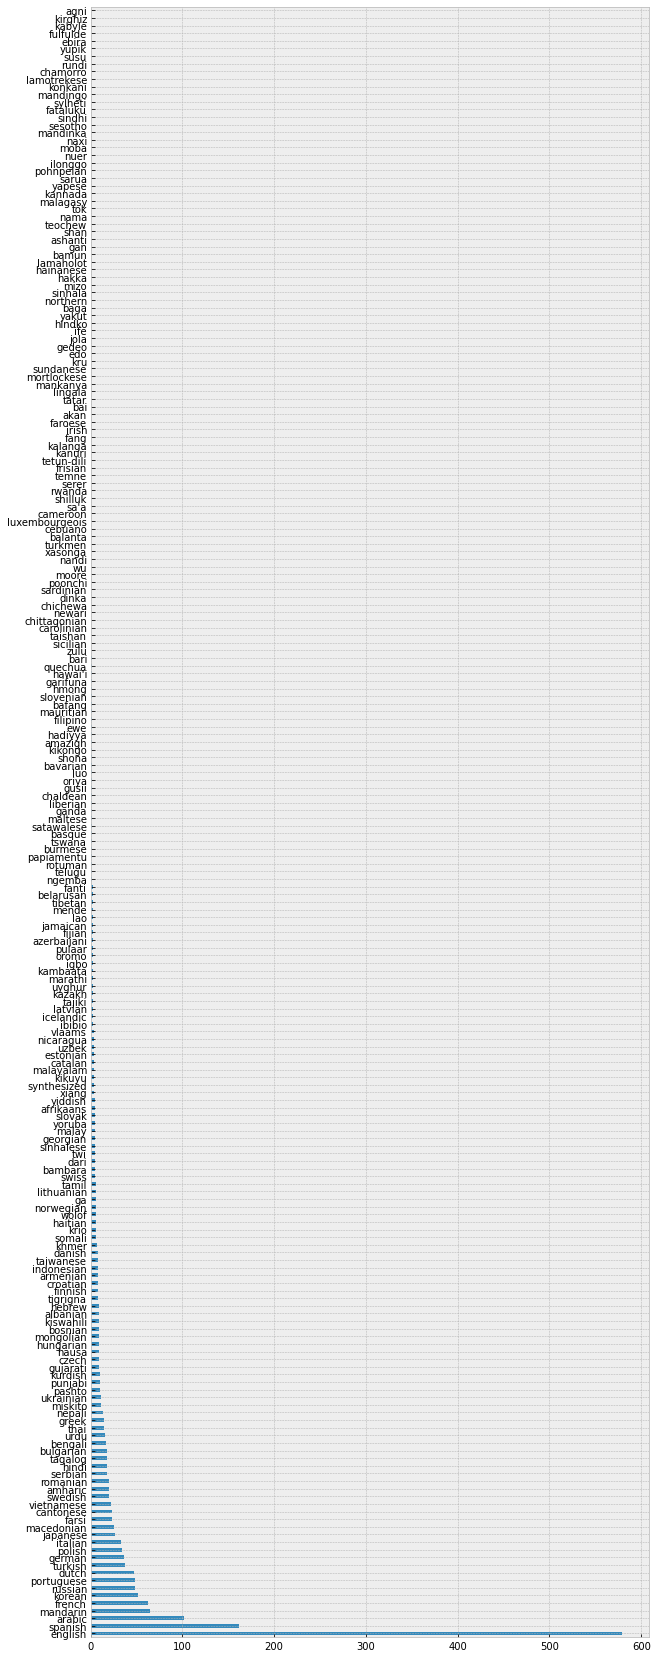

In [ ]:
pd.value_counts(df_accent['native_language']).plot.barh(figsize=(10, 30))

### Plot count value on *country* column with matplotlob horizontal bar

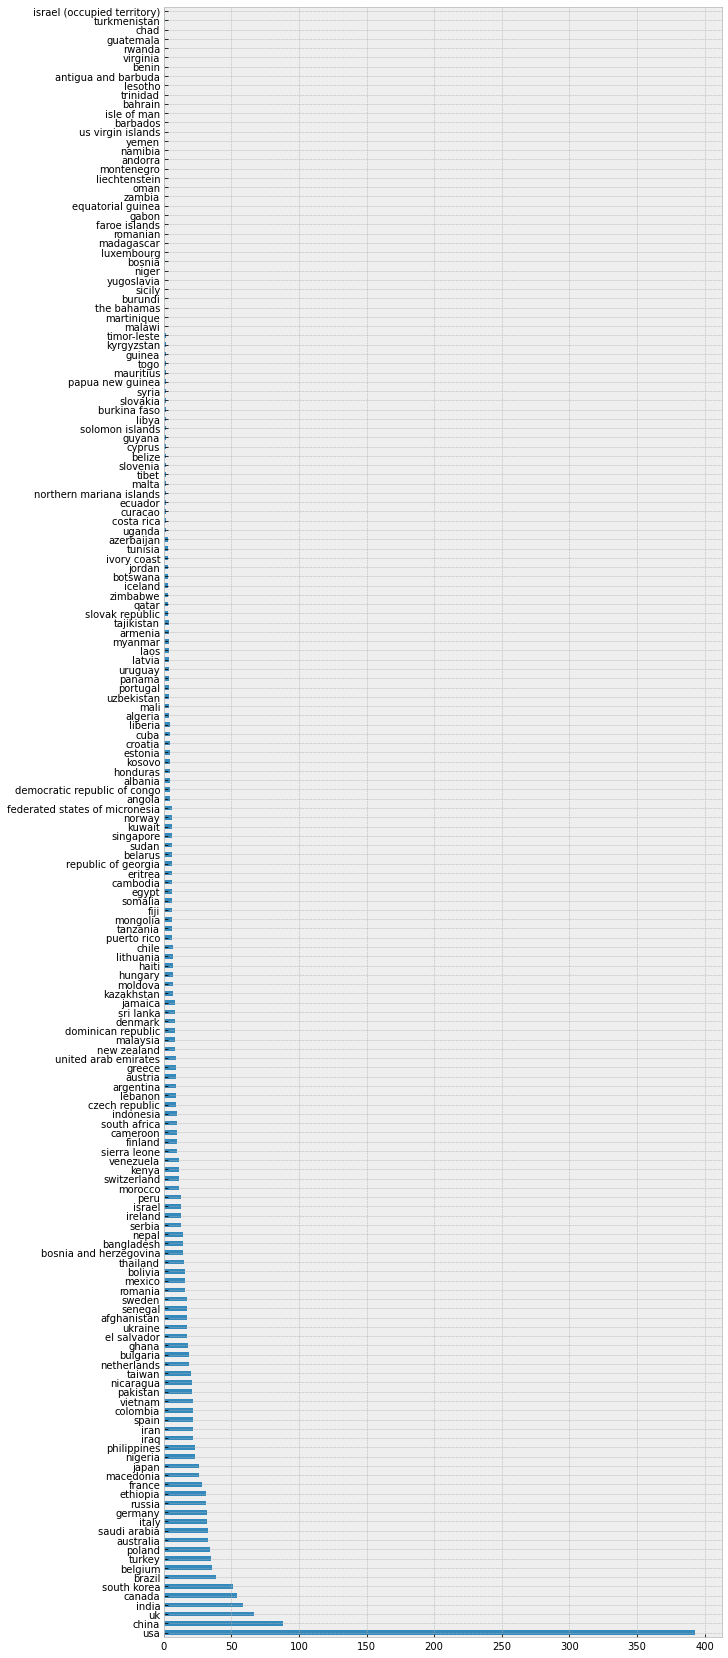

In [ ]:
pd.value_counts(df_accent['country']).plot.barh(figsize=(10, 30))

### Display statistical information and distribution plot on age column

count    2172.000000
mean       33.117173
std        14.453039
min         0.000000
25%        22.000000
50%        28.000000
75%        41.000000
max        97.000000
Name: age, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


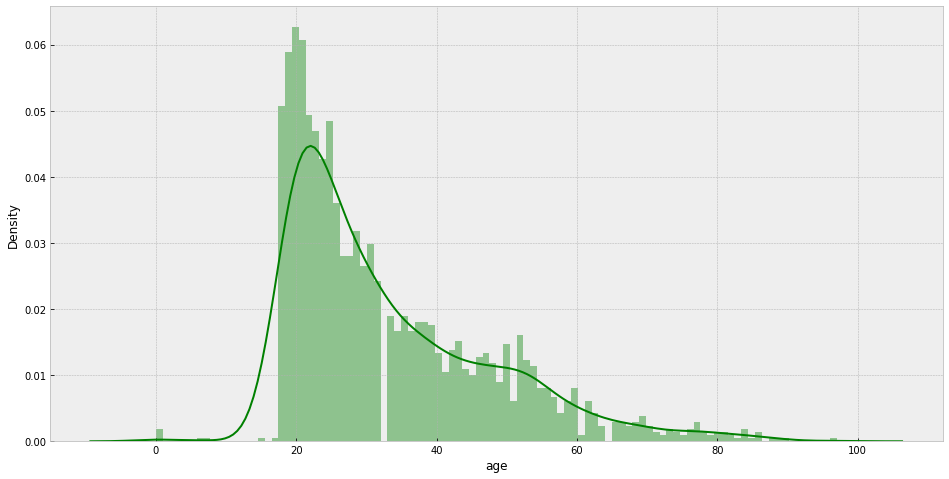

In [ ]:
print(df_accent['age'].describe())
plt.figure(figsize=(16, 8))
sns.distplot(df_accent['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Display statistical information on age group by native_language

In [ ]:
df_accent.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
native_language,,,,,,,,
english,579.0,34.482729,16.734510,6.0,21.00,29.0,44.0,90.0
spanish,162.0,34.129630,13.972528,17.0,23.00,30.0,45.0,80.0
arabic,102.0,30.950980,12.047248,18.0,21.25,28.0,38.0,70.0
mandarin,65.0,30.015385,8.193924,18.0,24.00,28.0,34.0,53.0
french,63.0,33.333333,16.246091,18.0,21.00,27.0,39.0,78.0
...,...,...,...,...,...,...,...,...
ife,1.0,30.000000,NaN,30.0,30.00,30.0,30.0,30.0
ilonggo,1.0,53.000000,NaN,53.0,53.00,53.0,53.0,53.0
irish,1.0,28.000000,NaN,28.0,28.00,28.0,28.0,28.0


### Display statistical information on age group by country

In [ ]:
df_accent.groupby("country")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
usa,393.0,35.652672,18.044364,6.0,21.00,29.0,47.0,90.0
china,88.0,29.477273,9.654940,18.0,23.00,27.0,33.0,72.0
uk,67.0,33.104478,14.900818,18.0,20.00,30.0,38.0,71.0
india,59.0,30.864407,11.501810,18.0,22.00,28.0,35.0,64.0
canada,54.0,31.629630,14.713998,18.0,21.25,26.5,37.5,78.0
...,...,...,...,...,...,...,...,...
chad,1.0,21.000000,NaN,21.0,21.00,21.0,21.0,21.0
burundi,1.0,36.000000,NaN,36.0,36.00,36.0,36.0,36.0
the bahamas,1.0,19.000000,NaN,19.0,19.00,19.0,19.0,19.0


### Display statistical information on age group by sex

In [ ]:
df_accent.groupby("sex")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
male,1123.0,32.197240,13.492936,0.0,22.0,28.0,39.0,97.0
female,1048.0,34.072519,15.337869,0.0,22.0,29.0,43.0,89.0
famale,1.0,65.000000,NaN,65.0,65.0,65.0,65.0,65.0


### Display statistical information on age group by birthplace

In [ ]:
df_accent.groupby("birthplace")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
birthplace,,,,,,,,
"seoul, south korea",25.0,32.040000,12.300000,18.0,23.0,27.0,40.00,62.0
"skopje, macedonia",21.0,20.047619,1.160870,19.0,19.0,20.0,20.00,24.0
"hong kong, china",19.0,23.473684,4.753577,18.0,19.5,22.0,27.00,33.0
"addis ababa, ethiopia",16.0,28.875000,8.663140,20.0,22.5,27.5,31.00,52.0
"bogota, colombia",14.0,36.785714,20.881271,17.0,21.0,30.5,48.25,80.0
...,...,...,...,...,...,...,...,...
"jalandhar, india",1.0,42.000000,NaN,42.0,42.0,42.0,42.00,42.0
"jalisco, mexico",1.0,45.000000,NaN,45.0,45.0,45.0,45.00,45.0
"jammu, kashmir, india",1.0,25.000000,NaN,25.0,25.0,25.0,25.00,25.0


### Test open audio file arabic accent
#### The text that they're reading is "**Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.**"

In [ ]:
fname2 = 'recordings/recordings/' + 'english385.mp3'
ipd.Audio(fname2)

### Test open audio file dutch accent

In [ ]:
fname2 = 'recordings/recordings/' + 'spanish97.mp3'
ipd.Audio(fname2)

In [ ]:
SAMPLE_RATE = 44100
fname_f = 'recordings/recordings/' + 'english385.mp3' 
y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 5)
fname_f2 = 'recordings/recordings/' + 'spanish98.mp3' 
y2, sr2 = librosa.load(fname_f2, sr=SAMPLE_RATE, duration = 5)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'Spanish Audio sampled at 44100 hrz')

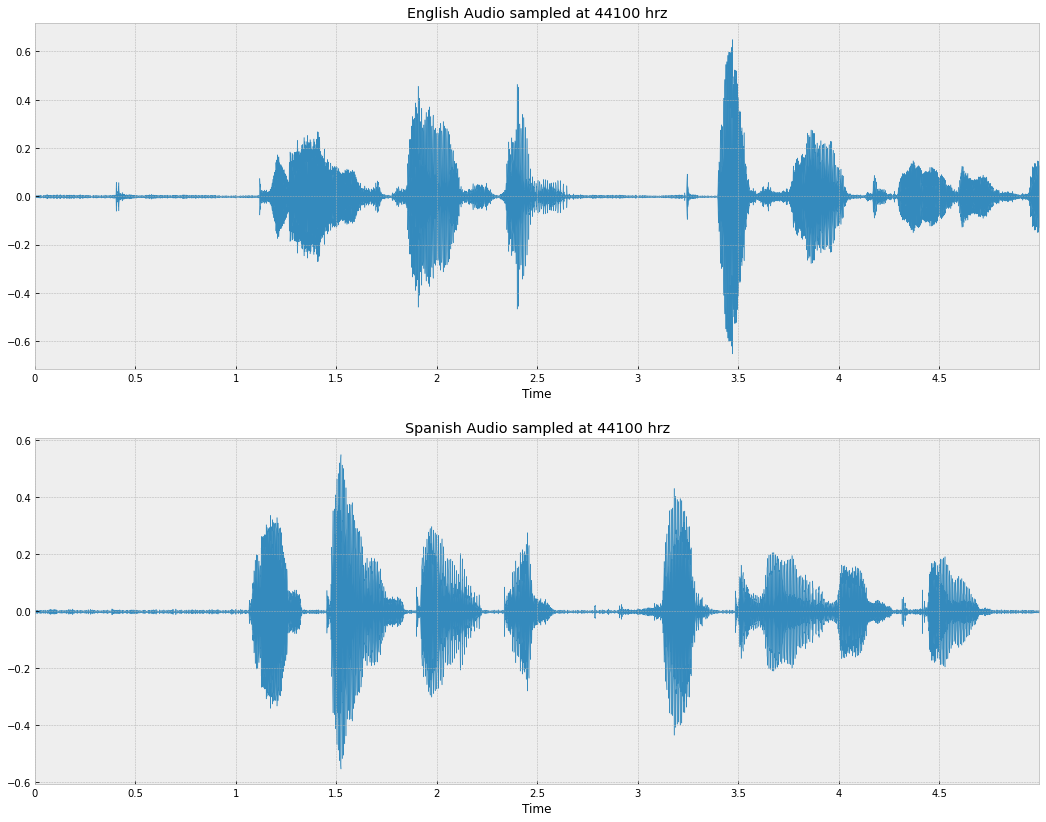

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('English Audio sampled at 44100 hrz')

plt.subplot(2, 1, 2)
librosa.display.waveplot(y2, sr=sr2)
plt.title('Spanish Audio sampled at 44100 hrz')

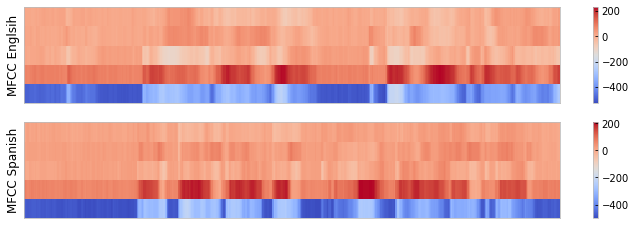

In [ ]:
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 5)
mfcc2 = librosa.feature.mfcc(y=y2, sr=SAMPLE_RATE, n_mfcc = 5)

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC Englsih')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(mfcc2)
plt.ylabel('MFCC Spanish')
plt.colorbar()

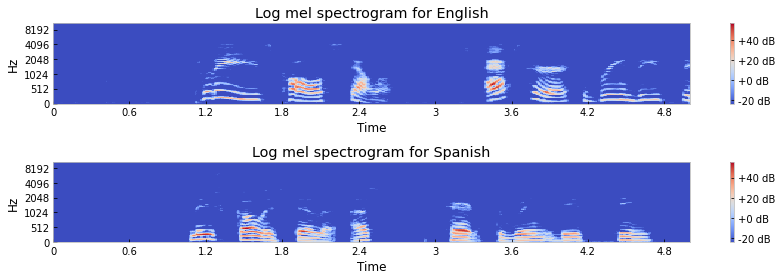

In [ ]:
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
melspec2 = librosa.feature.melspectrogram(y2, sr=sr2, n_mels=128)
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)
log_S2 = librosa.amplitude_to_db(melspec2)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
plt.subplot(2, 1, 1)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for English')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

plt.subplot(2, 1, 2)
librosa.display.specshow(log_S2, sr=sr2, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for Spanish')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_harmonic2, y_percussive2 = librosa.effects.hpss(y2)

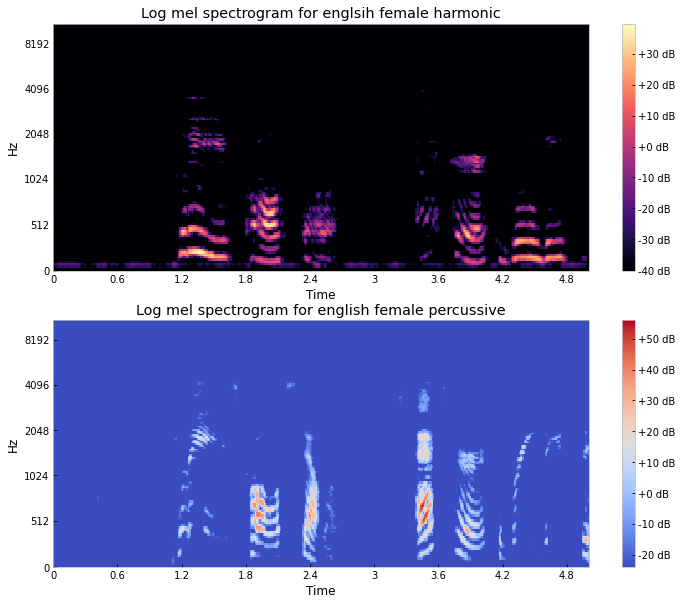

In [ ]:
# harmonic 
melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
log_h = librosa.amplitude_to_db(melspec)

# percussive
melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)
log_p = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram of both harmonic and percussive
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
librosa.display.specshow(log_h, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for englsih female harmonic')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_p, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for english female percussive')
plt.colorbar(format='%+02.0f dB')

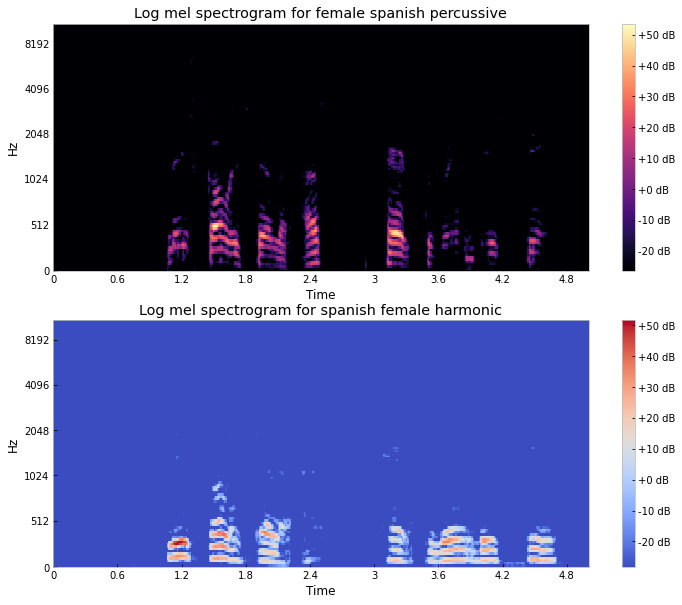

In [ ]:
# harmonic 
melspec = librosa.feature.melspectrogram(y_harmonic2, sr=sr2, n_mels=128)
log_h = librosa.amplitude_to_db(melspec)

# percussive
melspec = librosa.feature.melspectrogram(y_percussive2, sr=sr2, n_mels=128)
log_p = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram of both harmonic and percussive
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
librosa.display.specshow(log_p, sr=sr2, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for female spanish percussive')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_h, sr=sr2, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for spanish female harmonic')
plt.colorbar(format='%+02.0f dB')

In [ ]:
!apt install -y ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
!pip install pydub
!pip install librosa
!pip install beautifulsoup

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
# !git clone https://github.com/nkrao220/accent-classification.git

Cloning into 'accent-classification'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 30.40 MiB | 23.28 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
conda_path = ''
try:
    conda_path = !which conda
finally:
    print('')

if (len(conda_path) == 0):
    print('installing miniconda')
    !wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local
    !conda update conda -y -q
    !source /usr/local/etc/profile.d/conda.sh
    !conda init 
    !conda install -n root _license -y -q
else:
    print('found miniconda')

conda_envs = !conda env list
res = [i for i in conda_envs if 'test36' in i]
if (len(res) == 0):
    print('not found test36 env', len(res))
    !conda create -y -q --name test36 python=3.6 libarchive cartopy
else:
    print('found test36 env', len(res))


installing miniconda
--2021-01-31 19:37:48--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-01-31 19:37:48--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M  76.9MB/s    in 0.7s    

2021-01-31 19:37:48 (76.9 MB/s) - ‘Mini

In [ ]:
!conda create -n librosa_env python=3.6
!source activate librosa_env
!conda config --add channels conda-forge
!conda install librosa

Solving environment: \ done

## Package Plan ##

  environment location: /usr/local/envs/librosa_env

  added / updated specs:
    - python=3.6


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  ca-certificates    pkgs/main/linux-64::ca-certificates-2021.1.19-h06a4308_0
  certifi            pkgs/main/linux-64::certifi-2020.12.5-py36h06a4308_0
  ld_impl_linux-64   pkgs/main/linux-64::ld_impl_linux-64-2.33.1-h53a641e_7
  libedit            pkgs/main/linux-64::libedit-3.1.20191231-h14c3975_1
  libffi             pkgs/main/linux-64::libffi-3.3-he6710b0_2
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-9.1.0-hdf63c60_0
  libstdcxx-ng       pkgs/main/linux-64::libstdcxx-ng-9.1.0-hdf63c60_0
  ncurses            pkgs/main/linux-64::ncurses-6.2-he6710b0_1
  openssl            pkgs/main/linux-64::openssl-1.1.1i-h27cfd23_0
  pip                pkgs/main/linux-64::pip-20.3.3-py36h06a4308_0
  python             pkgs/main/linux-64:

In [ ]:
!conda install pandas
!conda install ipykernel
!conda install pydub
!conda install tqdm

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pydub


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydub-0.23.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          26 KB

The following NEW packages will be INSTALLED:

  pydub              conda-forge/noarch::pydub-0.23.1-py_0


Proce

In [ ]:
!sudo apt-get update -y

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [44.4 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://security.ubuntu.com/ubu

In [ ]:
!apt-get install gstreamer1.0-plugins-base gstreamer1.0-plugins-ugly

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  liba52-0.7.4 libcap2-bin libcdparanoia0 libdvdnav4 libdvdread4
  libgstreamer-plugins-base1.0-0 libgstreamer1.0-0 libmpeg2-4
  libopencore-amrnb0 libopencore-amrwb0 liborc-0.4-0 libpam-cap libsidplay1v5
  libvisual-0.4-0
Suggested packages:
  gvfs libdvdcss2 libvisual-0.4-plugins gstreamer1.0-tools sidplay-base
The following NEW packages will be installed:
  gstreamer1.0-plugins-base gstreamer1.0-plugins-ugly liba52-0.7.4 libcap2-bin
  libcdparanoia0 libdvdnav4 libdvdread4 libgstreamer-plugins-base1.0-0
  libgstreamer1.0-0 libmpeg2-4 libopencore-amrnb0 libopencore-amrwb0
  liborc-0.4-0 libpam-cap libsidplay1v5 libvisual-0.4-0
0 upgraded, 16 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,069 kB of archives.
After this operation, 11.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/u

In [ ]:
!python eda.py

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
eda.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['group'] = short_df.loc[:, 'country']
/usr/local/lib/python3.7/site-packages/pandas/core/series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
usa      391
india     

In [ ]:
import sklearn.preprocessing
import pydub
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
from sklearn.metrics import f1_score
from keras.callbacks import Callback
import tensorflow as tf
import keras.backend as K

In [ ]:
!python fromwebsite.py bio_data.csv mandarin english arabic

downloading from http://accent.gmu.edu/browse_language.php?function=find&language=mandarin
downloading from http://accent.gmu.edu/browse_language.php?function=find&language=english
downloading from http://accent.gmu.edu/browse_language.php?function=find&language=arabic
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=256
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=257
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=258
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=259
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=260
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=261
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=262
downloading from http://accent.gmu.edu/browse_language.php?function=detail&speakerid=430
downloading from h

In [ ]:
!python getaudio.py bio_data.csv

In [ ]:
!conda install keras

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.11.0             |   py37h89c1867_0         168 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    binutils_impl_linux-64-2.35.1|       h193b22a_1         9.3 MB  conda-forge
    binutils_linux-64-2.35     |      hc3fd857_29          22 KB  conda-fo

In [ ]:
!wget https://github.com/yatharthgarg/Speech-Accent-Recognition/raw/master/speech-accent-recognition/models/model1.h5

--2021-02-01 02:49:14--  https://github.com/yatharthgarg/Speech-Accent-Recognition/raw/master/speech-accent-recognition/models/model1.h5
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yatharthgarg/Speech-Accent-Recognition/master/speech-accent-recognition/models/model1.h5 [following]
--2021-02-01 02:49:14--  https://raw.githubusercontent.com/yatharthgarg/Speech-Accent-Recognition/master/speech-accent-recognition/models/model1.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 854696 (835K) [application/octet-stream]
Saving to: ‘model1.h5’

model1.h5           100%[===================>] 834.66K  

In [ ]:
!python trainmodel.py bio_data.csv accent_detection

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn